# Audio-Processing:
---
- ## How do we process audio?
- ## What are fourier transform and short-time fourier transform?
- ## What is a spectrogram?
---

1. ## How do we process audio?
To read the data, we used Python's librosa package used for audio processing.

`Note:`
- audio in analog is stored in continuous format whereas audio in digital form is stored in discrete. To know more, check out [this site](https://www.recordingconnection.com/reference-library/recording-education/analog-digital-whats-the-difference/#:~:text=It%E2%80%99s%20impossible%20to,1%20%C2%BE%2C%20and%202)

_Let us explore the difference between digital and analog recordings:_

In [1]:
import matplotlib.pyplot as plt
import numpy as np

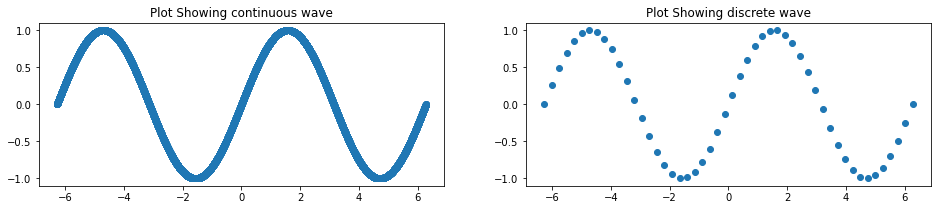

In [2]:
analog = np.linspace(-2*np.pi, 2*np.pi, num=10000)
analog_sin = np.array([np.sin(x) for x in analog])
digital = np.linspace(-2*np.pi, 2*np.pi, num=50)
digital_sin = np.array([np.sin(x) for x in digital])

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize= (16, 3))
axs[0].scatter(x=analog, y=analog_sin)
axs[1].scatter(x=digital, y=digital_sin)
axs[0].title.set_text("Plot Showing continuous wave")
axs[1].title.set_text("Plot Showing discrete wave")

### The left side shows how analog recordings are usually stored. The right side shows how digital recordings are stored. 
- The discrete nature of sound stored in digital sounds leads us to the next idea: `Sampling rate`

## As the definition states:
> `Sampling rate or sampling frequency defines the number of samples per second (or per other unit) taken from a continuous signal to make a discrete or digital signal.` _Source:[digitizations_guidelines](https://www.digitizationguidelines.gov/term.php?term=samplingrateaudio#:~:text=X%20%7C%20Y%20%7C%20Z-,Term%3A%20Sampling%20rate%20(audio),a%20discrete%20or%20digital%20signal.)_

#### In layman's terms, it is how many discrete points we took from the continuous wave to draw or store the wave in discrete form. A common theorem that follows the idea of sampling rate is [`The Nyquist–Shannon sampling theorem`](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem) which states that in order to reconstruct the analog or continuous waveform from its discrete form, the sampling rate must at least be twice the maximum frequency of the original form.

#### In layman's term, we would be able to draw the continuous graph on the left from having the graph on the right, if we have the sampling rate in the discrete graph to be twice the maximum frequency of the continuous graph. Humans typically can hear up to 20 kHz which is why the sampling rate of 44.1 kHz was widely known. 
---

## What are Fourier Transforms and Short-time Fourier transforms?

> `Fourier transform:A Fourier transform (FT) is a mathematical transform that decomposes functions depending on space or time into functions depending on spatial frequency or temporal frequency.`
Source: [Wikipedia](https://en.wikipedia.org/wiki/Fourier_transform)

Simply speaking, the audio files in our hand are frequency values along with the amplitude in `time-domain`. 

By using Fourier Transform, we could convert the data into `Frequency-domain`. We will be able to decompose the audio signal into its sine and cosine constituents.
![Image](https://pythontic.com/FourierTransform_fft.png)
_Source_: [Pythontic](https://pythontic.com/visualization/signals/fouriertransform_fft)

### `Fourier Transform` does not have any temporal information. It only stores the frequency information. This leads to the introduction of `Short-time Fourier Transform` that applies Fourier Transform on each unit of time, giving us the frequency information for each timestamp.
---

## What is a spectrogram?
> `Spectrogram: A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams. When the data are represented in a 3D plot they may be called waterfall displays.` Source:[Wikipedia](https://en.wikipedia.org/wiki/Spectrogram)

#### Simply speaking, a spectrogram, in audio, is just the representation of the frequency of a signal in terms of time. Given that we have the frequency information obtained from transforming audio signal into frequency domain w.r.t time, we can use this data to represent it as a graph

In [3]:
import librosa # Audio processing library 
import librosa.display # For displaying spectrograms

In [4]:
y, sr = librosa.load("./data/sample_audio.wav", sr = 44100) # Test file read in custom sampling rate 

In [5]:
# Apply stft
S = np.abs(librosa.stft(y)) # Worth reading why np.abs(https://stackoverflow.com/questions/61600977/can-someone-help-me-understand-the-np-abs-conversion-for-stft-in-librosa)

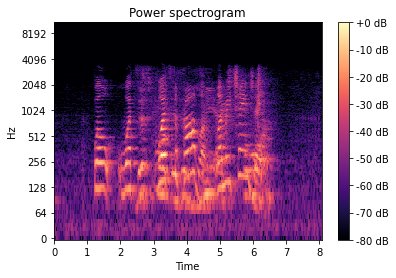

In [6]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")